<a href="https://colab.research.google.com/github/Gonzales-James/CpE-AIML/blob/main/Simple%20Linear%20Regression/58034_Lab03_Henerawr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 4 Lab 1: Simple Linear Regression


Create a class named `LinearRegression_Simple()` wherein it can compute for the linear regression for a single variable. The class will be required to have the following helper methods:
> 1. `covariance(vectA, vectB)`
>> input: 2 single-dimension vectors
>>
>> output: the covariance between the two input vectors (scalar) 
> 2. `pearsons_R(vectA, vectB)`
>> input: 2 single-dimension vectors
>>
>> output: the correlation between the two input vectors (scalar)
> 3. `train(X, y)`
>> input: 2 single-dimension vectors
>>
>> output: the weights of the linear regressor.
> 4. `predict(x)`
>> input: A testing vector. *Note*: this function should accept both scalar and vector values.
>>
>> output: the predicted value. Note: the procedure in solving for the predicted value should be vectorized. Use the concept of matrix multiplication.
> 5. `evaluate()`
>> input: 
>>
>> output: a `DataFrame` that displays the SST, SSR, SST, MSE, RMSE, R-squared, and the Adjusted R-squared of the model. Note: You should use the `predict()` method here.
> 5. `visualize()`
>> input: *none*
>>
>> output: a visualization of the linear regressor over the input dataset. It should be saved as a .jpg file into the running notebook with a dpi of 400.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
## No other packages or libraries can be added in this cell

In [12]:
### YOUR CODE HERE
class LinearRegression_Simple():
  
  def covariance(vectA, vectB):
    X = vectA - (vectA.mean())
    Y = vectB - (vectB.mean())
    cov = np.mean(X * Y)
    return print("cov(x,y) = ", cov)
  
  def pearsons_r(vectA, vectB):
    cov = np.cov(vectA, vectB)[0,1]
    SD_x = np.std(vectA)
    SD_y = np.std(vectB)
    r = cov / (SD_x*SD_y)
    return print("r = ", r)
  
  def train(X, y):
    global w0, w1
    SD_x = np.std(X)
    SD_y = np.std(y)
    r = np.corrcoef(X, y)[0,1]
    w1 = r * (SD_y/SD_x)
    w0 = y.mean() - w1 * X.mean()
    return print("w0: ", w0, "\nw1: ", w1)

  def predict(X):
    global pred
    pred = w0 + w1 * X
    index = np.array(list(range(0, pred.size)))
    return print("y_hat = ", pred, ", i = ", index)

  def evaluate(): # note: y_hat = predicted value; y = orig value; y_bar = y mean
    SSE = np.sum(np.square(pred - y[0:5]))
    SST = np.sum(np.square(y - y.mean()))
    MSE = np.mean(np.square(pred - y[0:5]))
    r2 = 1 - (SSE/SST)
    n = y.size 
    k = 1
    df = {'SST' : SST,
         'SSR' : np.sum(np.square(pred - y.mean())),
         'SSE' : SSE,
         'MSE' : MSE,
         'RMSE' : np.sqrt(MSE),
         'R-squared' : r2,
         'Adjusted R-squared' : 1 - ((1 - r2)*(n - 1)/(n-k-1))}
    return df
  
  def visualize():
    plt.figure(figsize=(5,5))
    plt.grid()
    plt.scatter(X[0:5], y[0:5])
    plt.plot(X[0:5], pred, color='red')
    return plt.show()
  
  ### Program the required methods

  ### You may add other helper functions in to make your code cleaner

In [158]:
### Testing Data
### DO NOT DELETE NOR MODIFY THIS CELL

X = np.arange(0,100,1,dtype=np.float64) ## features
m = np.random.uniform(0.3,0.8,(100,)) ## weights
b = np.random.uniform(8,10,(100,)) ## biases
y = -m*X-b  ## targets
X_test = np.arange(100,300,1,dtype=np.float64)

In [159]:
## TEST #1 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor = LinearRegression_Simple

In [160]:
## TEST #2 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
cov = regressor.covariance(X, y)
cov

cov(x,y) =  -492.92136676981835


Expected output value:
$$cov_{x,y} = -495.73$$

In [161]:
## TEST #3 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
r = regressor.pearsons_r(X,y)
r

r =  -0.9131687094040439


Expected output value:
$$r = -0.91$$

In [162]:
## TEST #4 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.train(X,y)
#regressor.model_

w0:  -7.68102408995092 
w1:  -0.5915647966034422


Expected output value:
$$\omega = \begin{bmatrix}\omega_1 \\ \omega_0\end{bmatrix} = \begin{bmatrix}-0.59 \\ -8.13\end{bmatrix}$$

In [163]:
## TEST #5 (Max pts: 25)
## DO NOT DELETE NOR MODIFY THIS CELL
preds = regressor.predict(X_test[:5])
preds

y_hat =  [-66.83750375 -67.42906855 -68.02063334 -68.61219814 -69.20376294] , i =  [0 1 2 3 4]


Expected output value:
$$\hat{y}_i = \begin{bmatrix} -67.02 \\ -67.61 \\ -68.20 \\ -68.79 \\ -69.38 \end{bmatrix}, i = \{0,1,2,3,4\}$$

In [164]:
## TEST #6 (Max pts: 30)
## DO NOT DELETE NOR MODIFY THIS CELL
model_stats = regressor.evaluate()
model_stats

{'Adjusted R-squared': 0.5256611274158263,
 'MSE': 3350.5578993514855,
 'R-squared': 0.5304524291591008,
 'RMSE': 57.884003829654745,
 'SSE': 16752.78949675743,
 'SSR': 4826.232885460434,
 'SST': 35678.57771419272}

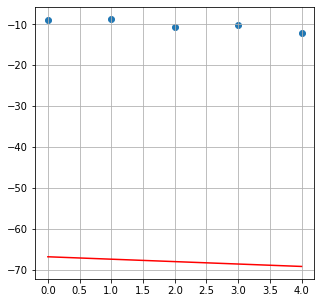

In [165]:
## TEST #7 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.visualize()